In [3]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')


In [4]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


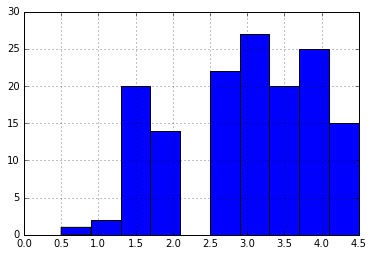

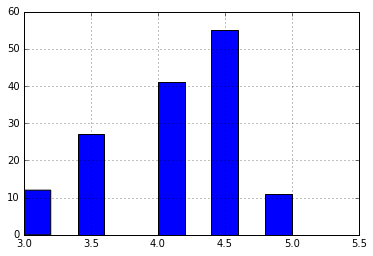

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
movies["Metacritic_norm_round"].hist()
plt.show()
movies["Fandango_Stars"].hist()
plt.show()


There are no scores below a 3.0 in the Fandango reviews. The Fandango reviews also tend to center around 4.5 and 4.0, whereas the Metacritic reviews seem to center around 3.0 and 3.5.


In [14]:
import numpy
print(movies["Fandango_Stars"].mean())
print(movies["Metacritic_norm_round"].mean())
print(numpy.std(movies["Fandango_Stars"]))
print(numpy.std(movies["Metacritic_norm_round"]))
print(numpy.median(movies["Fandango_Stars"]))
print(numpy.median(movies["Metacritic_norm_round"]))



4.08904109589
2.97260273973
0.53853216127
0.987561029704
4.0
3.0



<b>Fandango vs Metacritic Methodology:</b>

Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.


<b>Fandango vs Metacritic number differences:</b>

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.
Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.
Fandango ratings in general appear to be higher than metacritic ratings.
These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

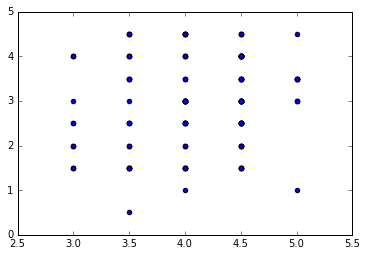

In [15]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

In [16]:
movies["fm_diff"]=movies["Fandango_Stars"]-movies["Metacritic_norm_round"]

In [17]:
movies["fm_diff"]=abs(movies["fm_diff"])

In [21]:
movies.sort_values(["fm_diff"],ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [24]:
# Finding the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. 
# This will help you determine if Fandango consistently has higher scores than Metacritic, 
# or if only a few movies were assigned higher ratings.

from scipy.stats import pearsonr
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

print(r_value)



0.178449190739


<b>Fandango and Metacritic correlation:</b>

The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [27]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
#y=mx+c
pred_3 = slope * 3.0 + intercept
pred_3

4.0917071528212041

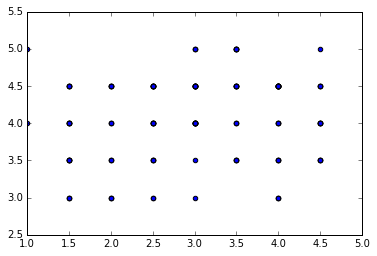

In [29]:
# create a residual plot to better visualize how the line relates to the existing datapoints. 
# This can helps to see if two variables are linearly related or not.

pred_1 = slope * 1.0 + intercept
pred_5 = 5 * slope + intercept

plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
#plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()
